In [99]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [100]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()  

In [101]:
X_train.shape

(60000, 28, 28)

In [102]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [103]:
X_train= X_train/255
X_test=X_test/255

In [104]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [105]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [106]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [108]:
history= model.fit(X_train,y_train,epochs=18,validation_split=0.2)

Epoch 1/18
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2888 - accuracy: 0.9179 - val_loss: 0.1533 - val_accuracy: 0.9574
Epoch 2/18
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1284 - accuracy: 0.9621 - val_loss: 0.1149 - val_accuracy: 0.9673
Epoch 3/18
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0865 - accuracy: 0.9743 - val_loss: 0.1041 - val_accuracy: 0.9701
Epoch 4/18
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0639 - accuracy: 0.9810 - val_loss: 0.0930 - val_accuracy: 0.9724
Epoch 5/18
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0857 - val_accuracy: 0.9735
Epoch 6/18
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0847 - val_accuracy: 0.9748
Epoch 7/18
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0888 - val_accuracy:

In [109]:
y_prob= model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [110]:
y_pred= y_prob.argmax(axis=1)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9785

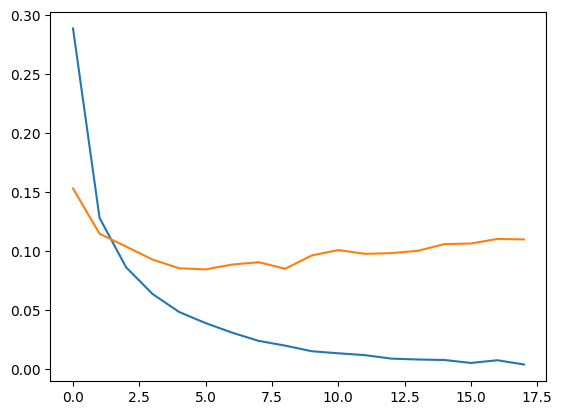

In [112]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

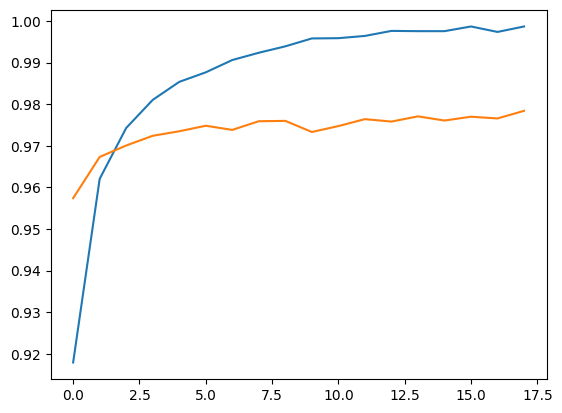

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

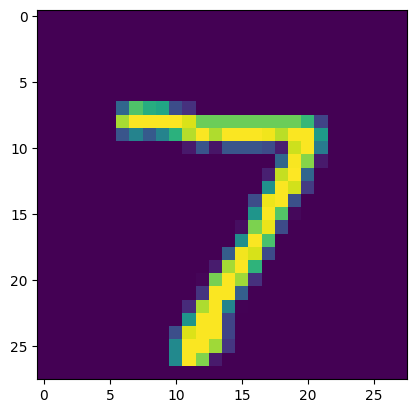

In [121]:
plt.imshow(X_test[0])

In [120]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 39ms/step


array([7], dtype=int64)